In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

## A. Load Datasets dan Data Cleaning
Digunakan 2 dataset untuk saling melengkapi dalam penggunaan parameter dan info yg ditampilkan di flask nantinya

## 1. Dataset Anime pertama

In [2]:
df1 = pd.read_csv('animes.csv')
print(len(df1))
df1.head()

19311


,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


### 1.1 Melihat columns yg tersedia

In [3]:
df1.columns.values

array(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes',
       'members', 'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype=object)

### 1.2 Perlakuan drop beberapa columns
Columns Genre pada dataset 1 didrop karena akan sulit dilakukan split Genre ditahap 'CountVectorizer', dan column Genre dapat digantikan oleh dataset 2.

In [4]:
dfAnim1 = df1.drop(['genre', 'aired'], axis =1)
print(len(dfAnim1))
dfAnim1.head()

19311


,uid,title,synopsis,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


### 1.3 Perlakuan tambahan ke dataset 1
- Dilakukan drop rows karena terdapat rows yang memiliki duplikat
- Dilakukan rename 'uid' menjadi 'anime_id' untuk menyamakan 'anime_id' sebagai key untuk merge.

In [5]:
dfAnim1.drop_duplicates(subset ="title", keep = "first", inplace = True)
dfAnim1 = dfAnim1.rename(columns={"uid": "anime_id"})
len(dfAnim1)

16214

### 1.4 Mengecek 'NaN / null value' pada dataset 1

In [6]:
dfAnim1.isnull().sum()

anime_id         0
title            0
synopsis       763
episodes       492
members          0
popularity       0
ranked        1663
score          341
img_url        165
link             0
dtype: int64

### 1.5 Membersihkan 'NaN / null value'

In [7]:
dfAnim1 = dfAnim1.dropna()
print(len(dfAnim1))

13675


In [8]:
dfAnim1.isnull().sum()

anime_id      0
title         0
synopsis      0
episodes      0
members       0
popularity    0
ranked        0
score         0
img_url       0
link          0
dtype: int64

## 2. Dataset Anime kedua

In [9]:
pd.set_option("display.max_columns", None)

df2 = pd.read_csv('anime_cleaned.csv')
print(len(df2))
df2.head()

6668


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


### 2.1 Melihat columns yg tersedia

In [10]:
df2.columns.values

array(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes',
       'status', 'airing', 'aired_string', 'aired', 'duration', 'rating',
       'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites',
       'background', 'premiered', 'broadcast', 'related', 'producer',
       'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme',
       'duration_min', 'aired_from_year'], dtype=object)

### 2.2 Membuat DataFrame baru
DataFrame baru berisi columns-columns yang digunakan sebagai parameter dan info yg ditampilkan di flask.

In [11]:
dfAnim2 = df2[['anime_id', 'title_japanese', 'type', 'rating', 'genre', 'premiered', 'aired_from_year', 'studio']]
print(len(dfAnim2))
dfAnim2.head()

6668


,anime_id,title_japanese,type,rating,genre,premiered,aired_from_year,studio
0,11013,妖狐×僕SS,TV,PG-13 - Teens 13 or older,"Comedy, Supernatural, Romance, Shounen",Winter 2012,2012.0,David Production
1,2104,瀬戸の花嫁,TV,PG-13 - Teens 13 or older,"Comedy, Parody, Romance, School, Shounen",Spring 2007,2007.0,Gonzo
2,5262,しゅごキャラ！！どきっ,TV,PG - Children,"Comedy, Magic, School, Shoujo",Fall 2008,2008.0,Satelight
3,721,プリンセスチュチュ,TV,PG-13 - Teens 13 or older,"Comedy, Drama, Magic, Romance, Fantasy",Summer 2002,2002.0,Hal Film Maker
4,12365,バクマン。,TV,PG-13 - Teens 13 or older,"Comedy, Drama, Romance, Shounen",Fall 2012,2012.0,J.C.Staff


### 2.3 Mengecek 'NaN / null value' pada dataset 2 

In [12]:
dfAnim2.isnull().sum()

anime_id              0
title_japanese        5
type                  0
rating                0
genre                 4
premiered          3702
aired_from_year       0
studio                0
dtype: int64

### 2.4 Membersihkan 'NaN / null value'
Yang dipilih hanya columns Genre karena memiliki peran penting pada parameter. Untuk _'title_japanese'_ dan _'premiered'_ adalah info yang ditampilkan di flask sehingga dapat diabaikan

In [13]:
dfAnim2 = dfAnim2[pd.notnull(dfAnim2['genre'])]
print(len(dfAnim2))
dfAnim2.isnull().sum()

6664


anime_id              0
title_japanese        5
type                  0
rating                0
genre                 0
premiered          3698
aired_from_year       0
studio                0
dtype: int64

## 3. Merge 2 DataFrame
Menggunakan _'anime_id'_ sebagai key

In [14]:
dfAnime = pd.merge(dfAnim1, dfAnim2, on=['anime_id'])
dfAnime

,anime_id,title,synopsis,episodes,members,popularity,ranked,score,img_url,link,title_japanese,type,rating,genre,premiered,aired_from_year,studio
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,ハイキュー!! セカンドシーズン,TV,PG-13 - Teens 13 or older,"Comedy, Sports, Drama, School, Shounen",Fall 2015,2015.0,Production I.G
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,四月は君の嘘,TV,PG-13 - Teens 13 or older,"Drama, Music, Romance, School, Shounen",Fall 2014,2014.0,A-1 Pictures
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss,メイドインアビス,TV,R - 17+ (violence & profanity),"Sci-Fi, Adventure, Mystery, Drama, Fantasy",Summer 2017,2017.0,Kinema Citrus
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,R - 17+ (violence & profanity),"Action, Military, Adventure, Comedy, Drama, Ma...",Spring 2009,2009.0,Bones
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...,傷物語〈Ⅲ冷血篇〉,Movie,R - 17+ (violence & profanity),"Action, Mystery, Supernatural, Vampire",NaN,2017.0,Shaft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,36043,Net-juu no Susume Special,An unaired 11th episode included with the Blu-...,1.0,62448,1630,1802.0,7.48,https://cdn.myanimelist.net/images/anime/7/901...,https://myanimelist.net/anime/36043/Net-juu_no...,ネト充のススメ,Special,PG-13 - Teens 13 or older,"Game, Comedy, Romance",NaN,2017.0,Signal. MD
6131,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT,NARUTO×UT,OVA,PG-13 - Teens 13 or older,"Action, Comedy, Super Power, Martial Arts, Sho...",NaN,2010.0,Studio Pierrot
6132,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...,ミイラの飼い方,TV,PG-13 - Teens 13 or older,"Slice of Life, Comedy, Supernatural",Winter 2018,2018.0,8bit
6133,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...,侵略!?イカ娘,TV,PG-13 - Teens 13 or older,"Slice of Life, Comedy, Shounen",Fall 2011,2011.0,Diomedea


### 3.1 Melakukan labeling pada Score dan Year

In [15]:
# Membuat label untuk 'score' dan 'airead_year'
pd.options.mode.chained_assignment = None  # default='warn'

dfAnime['score_n'] = 'Good'
dfAnime['year']    = 'y'

dfAnime['score_n'][dfAnime['score']>=9] = 'Excellent'
dfAnime['score_n'][(dfAnime['score']<9) & (dfAnime['score']>=8)] = 'Very Good'
dfAnime['score_n'][(dfAnime['score']<8) & (dfAnime['score']>=7)] = 'Good'
dfAnime['score_n'][(dfAnime['score']<7) & (dfAnime['score']>=6)] = 'Decent'
dfAnime['score_n'][(dfAnime['score']<6) & (dfAnime['score']>=5)] = 'Poor'
dfAnime['score_n'][dfAnime['score']<5] = 'Bad'

dfAnime['year'][dfAnime['aired_from_year']>=2014] = '2014 <'
dfAnime['year'][(dfAnime['aired_from_year']<2014) & (dfAnime['aired_from_year']>=2010)] = '2010-2014'
dfAnime['year'][(dfAnime['aired_from_year']<2010) & (dfAnime['aired_from_year']>=2006)] = '2006-2010'
dfAnime['year'][(dfAnime['aired_from_year']<2006) & (dfAnime['aired_from_year']>=2002)] = '2002-2006'
dfAnime['year'][(dfAnime['aired_from_year']<2002) & (dfAnime['aired_from_year']>=1998)] = '2002-1998'
dfAnime['year'][dfAnime['aired_from_year']<1998] = '< 1998'

dfAnime.head()

,anime_id,title,synopsis,episodes,members,popularity,ranked,score,img_url,link,title_japanese,type,rating,genre,premiered,aired_from_year,studio,score_n,year
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,ハイキュー!! セカンドシーズン,TV,PG-13 - Teens 13 or older,"Comedy, Sports, Drama, School, Shounen",Fall 2015,2015.0,Production I.G,Very Good,2014 <
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,四月は君の嘘,TV,PG-13 - Teens 13 or older,"Drama, Music, Romance, School, Shounen",Fall 2014,2014.0,A-1 Pictures,Very Good,2014 <
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss,メイドインアビス,TV,R - 17+ (violence & profanity),"Sci-Fi, Adventure, Mystery, Drama, Fantasy",Summer 2017,2017.0,Kinema Citrus,Very Good,2014 <
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,R - 17+ (violence & profanity),"Action, Military, Adventure, Comedy, Drama, Ma...",Spring 2009,2009.0,Bones,Excellent,2006-2010
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...,傷物語〈Ⅲ冷血篇〉,Movie,R - 17+ (violence & profanity),"Action, Mystery, Supernatural, Vampire",NaN,2017.0,Shaft,Very Good,2014 <


### 3.2 Export dataset menjadi file .csv

In [16]:
dfAnime.to_csv('DataAnime.csv', index=False)

## 4. EDA
Exploratory Data Analysis

Text(0, 0.5, 'Total Anime')

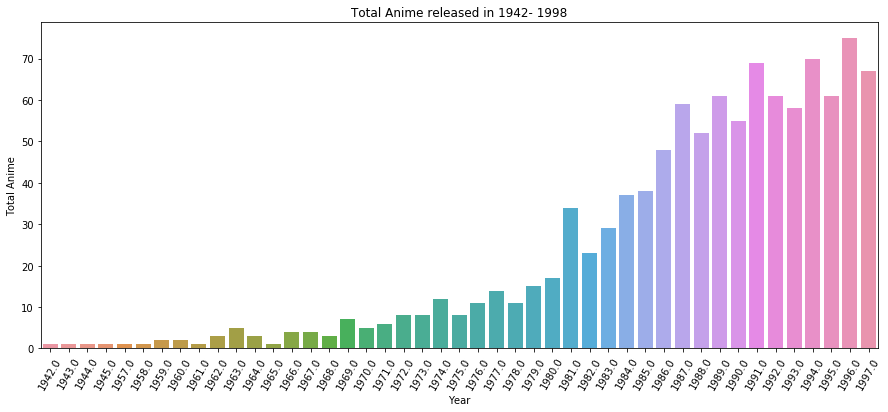

In [17]:
yearly = dfAnime.groupby(dfAnime['aired_from_year']).agg('count')['anime_id'].rename('count')

year = 1998
yearly1 = yearly[yearly.index < year]

plt.figure(figsize=(15,6))
sb.barplot(y=yearly1, x=yearly1.index)
plt.title(f'Total Anime released in 1942- {year}')
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Total Anime')

Text(0, 0.5, 'Total Anime')

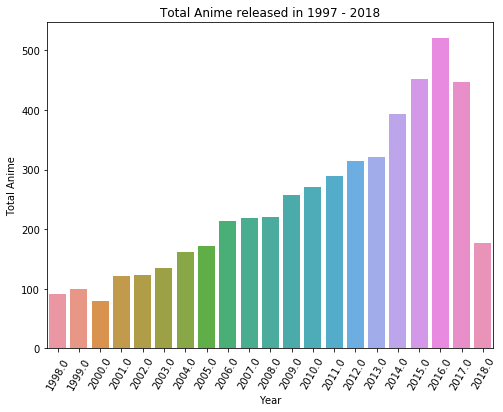

In [18]:
year2 = 1997
yearly2 = yearly[yearly.index > year2]

plt.figure(figsize=(8,6))
sb.barplot(y=yearly2, x=yearly2.index)
plt.title(f'Total Anime released in {year2} - 2018')
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Total Anime')

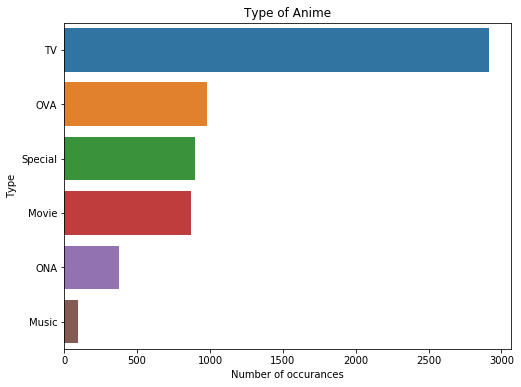

In [19]:
plt.figure(figsize=(8,6))
gen = dfAnime['type'].value_counts()
sb.barplot(x = gen, y = gen.index,)
plt.title("Type of Anime")
plt.xlabel("Number of occurances")
plt.ylabel("Type")
plt.show()

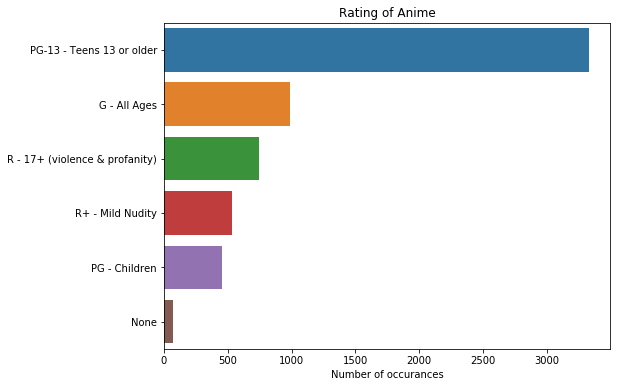

In [20]:
plt.figure(figsize=(8,6))
gen = dfAnime['rating'].value_counts()
sb.barplot(x = gen, y = gen.index,)
plt.title("Rating of Anime")
plt.xlabel("Number of occurances")
plt.ylabel("")
plt.show()

## 5. Machine Learning

Based on title, with 4 Parameter. Default
- Genre
- Rating Age
- Score
- Year

In [21]:
dfAnime['param1'] = dfAnime['genre'] + ', ' + dfAnime['rating'] + ', ' + dfAnime['score_n'] + ', ' + dfAnime['year']
# dfAnime.head()

In [22]:
# Merubah parameter menjadi matrix

ex1  = CountVectorizer(tokenizer = lambda x: x.split(', '))
var1 = ex1.fit_transform(dfAnime['param1'])

print(len(ex1.get_feature_names()))
print(ex1.get_feature_names())

59
['2002-1998', '2002-2006', '2006-2010', '2010-2014', '2014 <', '< 1998', 'action', 'adventure', 'bad', 'cars', 'comedy', 'decent', 'dementia', 'demons', 'drama', 'ecchi', 'excellent', 'fantasy', 'g - all ages', 'game', 'good', 'harem', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'none', 'parody', 'pg - children', 'pg-13 - teens 13 or older', 'police', 'poor', 'psychological', 'r - 17+ (violence & profanity)', 'r+ - mild nudity', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'very good', 'yuri']


In [23]:
cos_score1 = cosine_similarity(var1)

In [24]:
with open("modelPickle1", "wb") as modPick1:
    pickle.dump(cos_score1, modPick1)

<hr>

# -- Uji Coba --

<hr>

In [25]:
animeSuka = "Kimi no Na wa."
indexSuka = dfAnime[dfAnime['title'] == animeSuka].index.values[0]
indexSuka

649

In [26]:
animeSama = list(enumerate(cos_score1[indexSuka]))
# animeSama
animeSama[0]

(0, 0.5345224838248487)

In [27]:
animeSama = sorted(animeSama, key=lambda x:x[1], reverse=True)
# animeSama

In [28]:
for i in animeSama[:10]:
    print(dfAnime.iloc[i[0]]['title'])

Kimi no Na wa.
Kokoro ga Sakebitagatterunda.
Koe no Katachi
Koi to Uso
Guomin Laogong Dai Huijia
Little Busters!: EX
Wind: A Breath of Heart (TV)
Da Yu Hai Tang (Movie)
Itsudatte Bokura no Koi wa 10 cm Datta.
Ushinawareta Mirai wo Motomete
